<a href="https://colab.research.google.com/github/chris051091/Seminario-3/blob/master/climatologia/src/Climatologia_Temperatura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PATH_DRIVE = 'drive/MyDrive/Seminario-3-master'
PATH_DADOS = '/climatologia/dados/'
FILE_TEMPERATURA = 'Temperatura_corregidos.csv'

In [ ]:
#Read the data

df = pd.read_csv(PATH_DRIVE + PATH_DADOS + FILE_TEMPERATURA)

In [ ]:
#Start every matrix
## The matrix have 24 rows (hours of the day) and 12 columns (every station)

nr_season = np.ones([24,12]) # Matrix for the no raining season mean
r_season = np.ones([24,12]) # Matrix for the raining season mean
snr_season = np.ones([24,12]) # Matrix for the no raining season std
sr_season = np.ones([24,12]) # Matrix for the raining season std

#Separate the seasons in dataframes
##Start the dataframes
nrain = pd.DataFrame()
rain = pd.DataFrame()
##Iniciate the month in every season
xnr = ['/12/', '/01/', '/02/', '/06/', '/07/', '/08/']
xr = ['/03/', '/04/', '/05/', '/09/', '/10/', '/11/']
##y is to make the hourly calculation
y = np.arange(0,24)

##Merge the dataframe, so that it will be only one for every season
c = 0
for i in xnr:
    sea1 = df[df['FechayHora'].str.contains(i)]
    nrain = nrain.append(sea1, ignore_index = True)
    sea1 = df[df['FechayHora'].str.contains(xr[c])]
    rain = rain.append(sea1, ignore_index = True)
    c = c + 1

#Fill the matrix of the no raining season
count = 0
for j in y:
    sea2 = nrain[nrain['FechayHora'].str.contains(' '+str(j)+':')] #Notice that here the script search for the hour
    contar = 0
    #We have the hours of every station, now lets take every station and get the mean and std
    for k in sea2.columns[2:]: 
        z = sea2[k].mean() #Calculate the mean
        z1 = sea2[k].std() #Calculate the std
        #Fill the mean matrix!, see that contar is the row, so the code write every row first
        nr_season[count,contar] = z 
        snr_season[count,contar] = z1 #Fill std matrix
        contar = contar + 1
    count = count + 1
    
#Do the same for the the raining season
count = 0
for j in y:
    sea2 = rain[rain['FechayHora'].str.contains(' '+str(j)+':')]
    contar = 0
    for k in sea2.columns[2:]:
        z = sea2[k].mean()
        z1 = sea2[k].std()
        r_season[count,contar] = z
        sr_season[count,contar] = z1
        contar = contar + 1
    count = count + 1
    
# Notice that, if you want the values of a station you need to write nr_season[:,0]
# Where 0 is the value of the first station of your file in this case, Suba

In [ ]:
r_season[:, 11]

array([11.93055556, 11.57319444, 11.21984733, 10.94263889, 10.72055556,
       10.54503127, 10.55351427, 11.51244784, 13.83849896, 15.70305981,
       16.81339846, 17.53356546, 18.04054242, 18.21600557, 17.97030598,
       17.60582524, 17.17943016, 16.44435933, 15.25194175, 14.18432732,
       13.62      , 13.18120666, 12.76164003, 12.34364142])

In [ ]:
sea2

,Unnamed: 0,FechayHora,Suba,Carvajal,Tunal,San Cristobal,MinAmbiente,Kennedy,Usaquen,Las Ferias,Fontibon,Puente Aranda,CAR,Guaymaral
23,1438,1/03/2013 23:00,11.3,14.9,12.861806,12.8,12.4,11.2,12.0,14.5,14.064935,13.3,13.4,11.2
47,1462,2/03/2013 23:00,10.8,14.3,12.861806,11.3,12.1,9.4,12.5,14.8,14.064935,13.5,10.2,10.5
71,1486,3/03/2013 23:00,12.3,15.5,12.861806,12.9,13.4,12.3,13.8,14.7,14.064935,14.5,13.6,12.7
95,1510,4/03/2013 23:00,12.9,14.2,12.861806,12.7,12.9,13.1,13.1,14.6,14.064935,13.8,14.2,12.9
119,1534,5/03/2013 23:00,14.8,16.4,12.861806,14.1,14.5,14.5,14.9,16.2,14.064935,15.4,15.6,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35039,69286,26/11/2020 23:00,13.8,14.8,14.400000,12.2,NaN,14.6,13.6,13.7,14.800000,13.9,13.9,13.1
35063,69310,27/11/2020 23:00,11.5,12.3,11.900000,11.0,NaN,12.2,11.7,11.3,12.200000,11.6,12.0,11.0
35087,69334,28/11/2020 23:00,11.8,13.3,12.500000,11.5,NaN,13.1,12.7,11.9,13.400000,12.6,12.6,11.5
35111,69358,29/11/2020 23:00,11.9,14.6,12.300000,12.1,NaN,14.1,13.5,12.5,14.200000,13.0,10.7,12.6


Text(0, 0.5, 'Temperatura')

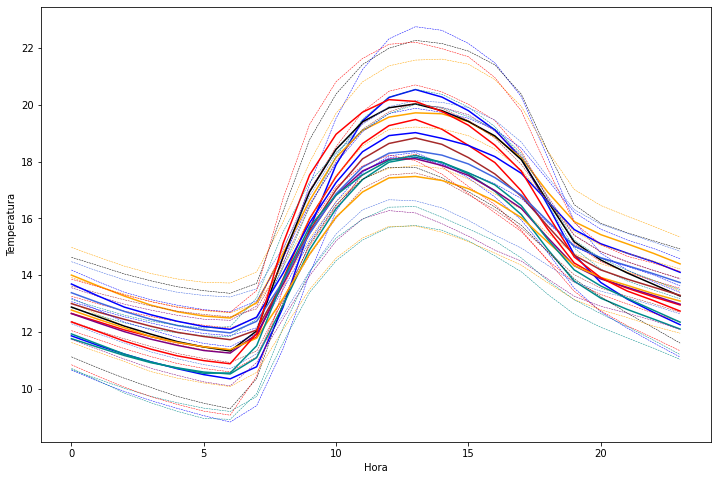

In [ ]:
#I made a plot in a very automatic way, you need to improve it, I think a plot matrix es better, but you need to check
plt.figure(figsize = (12,8))
color = ['b','orange', 'red', 'darkcyan', 'purple', 'k', 'brown', 'royalblue', 'b','orange', 'red', 'darkcyan']
c = 0
for i in range(0,12):
    plt.plot(r_season[:,i], color = color[c])
    plt.plot(r_season[:,i] + sr_season[:,i], color = color[c], linestyle = '--', linewidth = 0.5)
    plt.plot(r_season[:,i] - sr_season[:,i], color = color[c], linestyle = '--', linewidth = 0.5)
    c = c + 1
plt.xlabel("Hora")
plt.ylabel("Temperatura")